Imports

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 0 - Getting the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset_path = "/content/gdrive/MyDrive/Uni./Data Mining/iris.zip"
dataset_path

'/content/gdrive/MyDrive/Uni./Data Mining/iris.zip'

In [ ]:
df = pd.read_csv(dataset_path,
names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


# 1 - Missing Data

In [ ]:
nan_sepal_length = df['sepal_length'].isna().sum()
nan_sepal_width = df['sepal_width'].isna().sum()
nan_petal_length = df['petal_length'].isna().sum()
nan_petal_width = df['petal_width'].isna().sum()

print("number of NANs in sepal length attribute: ", nan_sepal_length)
print("number of NANs in sepal width attribute: ", nan_sepal_width)
print("number of NANs in petal length attribute: ", nan_petal_length)
print("number of NANs in petal width attribute: ", nan_petal_width)

number of NANs in sepal length attribute:  2
number of NANs in sepal width attribute:  0
number of NANs in petal length attribute:  2
number of NANs in petal width attribute:  3


Because number of NANs are very small we can drop these rows from our dataset.

In [ ]:
df = df.dropna()
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,Iris-virginica
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
157,6.2,3.4,5.4,2.3,Iris-virginica


# 2 - Non-numeric values

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

LabelEncoder()

In [ ]:
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
df['target'] = le.fit_transform(df['target'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


**Problem of Label Encoding:**

مشکلی که این روش دارد این است که دارد به نوعی ترتیب به کلاس‌ها و تارگت‌های ما می‌دهد در حالی که ممکن است اصلا ترتیبی وجود نداشته باشد و یا اینکه ترتیبی که داده شده‌است درست نباشد. در نتیجه ممکن است تا مدل ما به اشتباه این ترتیب را یاد بگیرد و دچار خطا شود.

**Explanation of One-hot Encoding:**

این روش دیگر مشکل روش قبل را ندارد زیرا در آن فاضله‌ی تمام لیبل‌ها از یکدیگر یکسان می‌باشد. در این روش برای هر کلاس یک بردار در نظر می‌گیریم به طول تعداد کلاس‌ها و تمام عناثر آن را صفر قرار می‌دهیم به غیر از درایه‌ی آن کلاس. به عنوان مثال برای دیتاستی که در حال کار روی آن هستیم می‌توانیم به صورت زیر عمل کنیم:

iris_setosa = [1,0,0] <br>
iris_versicolor = [0,1,0] <br>
iris_virginica = [0,0,1] <br>



# 3 - Normalization

In [ ]:
variances = []
means = []

for column in df.loc[:, df.columns != 'target']:
  variances.append(df[column].var())
  means.append(df[column].mean())

print("Variance before normalization: ", variances)
print("Mean before normalization: ", means)

Variance before normalization:  [0.6856935123042505, 0.18800402684563763, 3.1131794183445156, 0.5824143176733784]
Mean before normalization:  [5.843333333333335, 3.0540000000000007, 3.7586666666666693, 1.1986666666666672]


In [ ]:
scaler = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
153,1.038005,-0.124958,0.819624,1.447956,2
154,0.553333,-1.281972,0.705893,0.922064,2
155,0.795669,-0.124958,0.819624,1.053537,2
157,0.432165,0.800654,0.933356,1.447956,2


In [ ]:
variances = []
means = []

for column in df.loc[:, df.columns != 'target']:
  variances.append(df[column].var())
  means.append(df[column].mean())

print("Variance after normalization: ", variances)
print("Mean after normalization: ", means)

Variance after normalization:  [1.006711409395973, 1.0067114093959733, 1.0067114093959728, 1.0067114093959733]
Mean after normalization:  [-2.7755575615628914e-16, -5.140332604014475e-16, 1.1546319456101628e-16, 9.251858538542972e-16]


# 4 - PCA

In [ ]:
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_features

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
153,1.038005,-0.124958,0.819624,1.447956
154,0.553333,-1.281972,0.705893,0.922064
155,0.795669,-0.124958,0.819624,1.053537
157,0.432165,0.800654,0.933356,1.447956


In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_features)

In [ ]:
print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


# 5 - Visualization

Visualization using plotly

In [ ]:
fig = px.scatter(components, x=0, y=1, color=df['target'])
fig.show()

Visualization using matplotlib

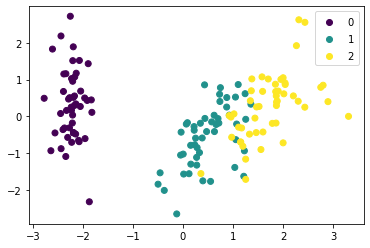

In [ ]:
plt.scatter(x=components[:, 0], y=components[:, 1], c=df['target'])
plt.legend(*scatter.legend_elements())
plt.show()

Box plot

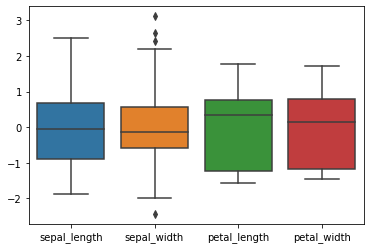

In [ ]:
sns.boxplot(data=df_features)